# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Analysis

Three observable trends are as follows.
1. Firstly, after viewing the data and visualizations that I have generated, there appears to be no correlation between latitude and humidity in both the Northern and Southern Hemispheres. In the Northern Hemisphere's Humidity (%) vs. Latitude Linear Regression, the r value, or correlation coefficient, is: 0.17189532688029632, showing that there is no correlation between these two variables. In the Southern Hemisphere's Humidity (%) vs. Latitude Linear Regression, the r value, or correlation coefficient, is 0.1064604115414379, showing that there is no correlation between these two variables. This is showing that as latitude changes in both hemispheres, the humidity is not affected based on which latitude you are in.
2. Secondly, after viewing the data and visualizations that I have generated, there appears to be a weakly positive correlation between latitude and cloudiness in the Northern Hemisphere, and no correlation between latitude and cloudiness in the Southern Hemisphere. In the Northern Hemisphere's Cloudiness (%) vs. Latitude Linear Regression, the r value, or correlation coefficient, is: 0.20475750307131288, showing that there is a weakly positive correlation between these two variables. In the Southern Hemisphere's Cloudiness (%) vs. Latitude Linear Regression, the r value, or the correlation coefficient, is: 0.06072386698185061, showing that there is no correlation between these two variables.
3. Lastly, after viewing the data and visualizations that I have generated, there appears to be no correlation between latitude and wind speed in the Northern and Southern Hemispheres. In the Northern Hemisphere's Wind Speed (mph) vs. Latitude Linear Regression, the r value, or correlation coefficient is: 0.2559625149252368, showing that there is a weakly positive correlation between these two variables. In the Southern Hemisphere's Wind Speed (mph) vs. Latitude Linear Regression, the r value, or correlation coefficient is: -0.12723590279574876, showing that there is no correlation between these two variables.

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
# URL to retrieve city data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# List to holding reponse info
longitude = []
temperature = []
temperature_max = []
hum = []
wind_speed = []
latitude = []
date = []
country = []
cloudiness = []


# Loop through list of cities and request data on each
print("Beginning Data Retrieval")
print("-------------------------------------")
count = 0
set = 1
for index, city in enumerate(cities):
    count = count + 1
    # Get city weather data in sets of 50 cities
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp'])
        temperature_max.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        latitude.append(np.nan)
        longitude.append(np.nan)
        temperature.append(np.nan)
        temperature_max.append(np.nan)
        hum.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("-------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------")

Beginning Data Retrieval
-------------------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | shieli
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | chokurdakh
Processing Record 5 of Set 1 | alofi
Processing Record 6 of Set 1 | port lincoln
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | ankpa
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | hobyo
Processing Record 11 of Set 1 | saleaula
City not found. Skipping...
Processing Record 12 of Set 1 | komsomolskiy
Processing Record 13 of Set 1 | wulanhaote
City not found. Skipping...
Processing Record 14 of Set 1 | bathsheba
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | pierre
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | ji-parana
City not found. Skipping...
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 |

Processing Record 36 of Set 4 | merauke
Processing Record 37 of Set 4 | sortland
Processing Record 38 of Set 4 | balikpapan
Processing Record 39 of Set 4 | ballstad
City not found. Skipping...
Processing Record 40 of Set 4 | clyde river
Processing Record 41 of Set 4 | tokur
Processing Record 42 of Set 4 | nikolayevsk-na-amure
Processing Record 43 of Set 4 | sangueya
Processing Record 44 of Set 4 | menongue
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | kpandu
Processing Record 47 of Set 4 | ponta do sol
Processing Record 48 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 49 of Set 4 | isangel
Processing Record 50 of Set 4 | nouadhibou
Processing Record 1 of Set 5 | laguna
Processing Record 2 of Set 5 | yzeure
Processing Record 3 of Set 5 | luderitz
Processing Record 4 of Set 5 | itoman
Processing Record 5 of Set 5 | billings
Processing Record 6 of Set 5 | petrozavodsk
Processing Record 7 of Set 5 | ginir
Processing Record 8 of Set 5 | carna

Processing Record 23 of Set 8 | leningradskiy
Processing Record 24 of Set 8 | warqla
City not found. Skipping...
Processing Record 25 of Set 8 | kanniyakumari
Processing Record 26 of Set 8 | baghdad
Processing Record 27 of Set 8 | homer
Processing Record 28 of Set 8 | bafata
Processing Record 29 of Set 8 | maningrida
Processing Record 30 of Set 8 | mahadday weyne
City not found. Skipping...
Processing Record 31 of Set 8 | broome
Processing Record 32 of Set 8 | bay roberts
Processing Record 33 of Set 8 | nome
Processing Record 34 of Set 8 | kuytun
Processing Record 35 of Set 8 | ancud
Processing Record 36 of Set 8 | plettenberg bay
Processing Record 37 of Set 8 | okha
Processing Record 38 of Set 8 | chara
Processing Record 39 of Set 8 | sancti spiritus
Processing Record 40 of Set 8 | adrar
Processing Record 41 of Set 8 | ilinskoye-khovanskoye
Processing Record 42 of Set 8 | pisco
Processing Record 43 of Set 8 | timmins
Processing Record 44 of Set 8 | bistrica
Processing Record 45 of Set

Processing Record 9 of Set 12 | chunskiy
Processing Record 10 of Set 12 | aniva
Processing Record 11 of Set 12 | kirakira
Processing Record 12 of Set 12 | lata
Processing Record 13 of Set 12 | armacao dos buzios
City not found. Skipping...
Processing Record 14 of Set 12 | takoradi
Processing Record 15 of Set 12 | parrita
Processing Record 16 of Set 12 | show low
Processing Record 17 of Set 12 | mirabad
Processing Record 18 of Set 12 | greeley
Processing Record 19 of Set 12 | barra patuca
Processing Record 20 of Set 12 | iberia
Processing Record 21 of Set 12 | kozachi laheri
Processing Record 22 of Set 12 | mayo
Processing Record 23 of Set 12 | portland
Processing Record 24 of Set 12 | ordino
Processing Record 25 of Set 12 | palencia
Processing Record 26 of Set 12 | otacilio costa
Processing Record 27 of Set 12 | fairbanks
Processing Record 28 of Set 12 | saint-germain-de-grantham
Processing Record 29 of Set 12 | port hardy
Processing Record 30 of Set 12 | barga
Processing Record 31 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
cities_dataframe = pd.DataFrame({
    "City": cities,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": temperature_max,
    "Humidity": hum,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Drop cities that were skipped since they could did not return any response from OpenWeatherMap API.
cities_dataframe = cities_dataframe.dropna(how="any")

# Export the city data into a .csv file.
cities_dataframe.to_csv("../output_data/cities.csv", index=False)

# Display the Dataframe
cities_dataframe.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,81.45,71.0,51.0,7.29,KI,1.666491e+09
1,shieli,44.1667,66.7500,43.93,74.0,31.0,5.70,KZ,1.666492e+09
2,new norfolk,-42.7826,147.0587,56.57,74.0,100.0,4.00,AU,1.666491e+09
3,chokurdakh,70.6333,147.9167,12.60,95.0,100.0,10.78,RU,1.666491e+09
4,alofi,-19.0595,-169.9187,77.79,79.0,100.0,10.09,NU,1.666491e+09


In [32]:
# Display descriptive statistics of the Dataframe
cities_dataframe.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,20.407011,14.199990,60.881165,74.670251,58.890681,7.677778,1.666492e+09
std,32.597676,90.627833,18.667595,18.671079,40.929951,5.405748,1.602482e+02
min,-54.800000,-175.200000,1.780000,13.000000,0.000000,0.000000,1.666491e+09
25%,-3.784475,-64.327800,47.952500,66.000000,12.000000,3.695000,1.666492e+09
50%,22.622500,13.537900,64.830000,78.500000,75.000000,6.430000,1.666492e+09
75%,46.891100,100.961275,76.490000,89.000000,100.000000,10.360000,1.666492e+09
max,78.218600,178.416700,95.040000,100.000000,100.000000,29.930000,1.666492e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [33]:
# Display descriptive statistics of the Dataframe
cities_dataframe.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,20.407011,14.199990,60.881165,74.670251,58.890681,7.677778,1.666492e+09
std,32.597676,90.627833,18.667595,18.671079,40.929951,5.405748,1.602482e+02
min,-54.800000,-175.200000,1.780000,13.000000,0.000000,0.000000,1.666491e+09
25%,-3.784475,-64.327800,47.952500,66.000000,12.000000,3.695000,1.666492e+09
50%,22.622500,13.537900,64.830000,78.500000,75.000000,6.430000,1.666492e+09
75%,46.891100,100.961275,76.490000,89.000000,100.000000,10.360000,1.666492e+09
max,78.218600,178.416700,95.040000,100.000000,100.000000,29.930000,1.666492e+09


In [34]:
#  Get the indices of cities that have humidity over 100%.
hum_over_100 = cities_dataframe[(cities_dataframe["Humidity"] > 100)].index
hum_over_100

Int64Index([], dtype='int64')

In [36]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleaned_city_data = cities_dataframe.drop(hum_over_100, inplace=False)
cleaned_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,81.45,71.0,51.0,7.29,KI,1.666491e+09
1,shieli,44.1667,66.7500,43.93,74.0,31.0,5.70,KZ,1.666492e+09
2,new norfolk,-42.7826,147.0587,56.57,74.0,100.0,4.00,AU,1.666491e+09
3,chokurdakh,70.6333,147.9167,12.60,95.0,100.0,10.78,RU,1.666491e+09
4,alofi,-19.0595,-169.9187,77.79,79.0,100.0,10.09,NU,1.666491e+09


In [37]:
# Export filtered city data into a csv
cleaned_city_data.to_csv("../output_data/cleaned_city_data.csv", index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

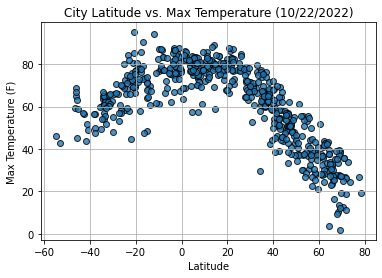

In [41]:
date = dt.date.today().strftime("%m/%d/%Y")

# Create a scatter plot to showcase the relationship between latitude and max temperature
x_values = cleaned_city_data["Lat"]
y_values = cleaned_city_data["Max Temp"]

plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save figure
plt.savefig("../output_data/Fig1.png", bbox_inches="tight")
plt.show()

The code is analyzing if there is a correlation between city latitude and max temperature.

## Latitude vs. Humidity Plot

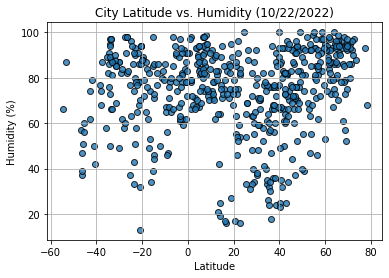

In [42]:
date = dt.date.today().strftime("%m/%d/%Y")

# Create a scatter plot to showcase the relationship between latitude and humidity
x_values = cleaned_city_data["Lat"]
y_values = cleaned_city_data["Humidity"]

plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save figure
plt.savefig("../output_data/Fig2.png", bbox_inches="tight")
plt.show()

The code is analyzing if there is a correlation between city latitude and humidity.

## Latitude vs. Cloudiness Plot

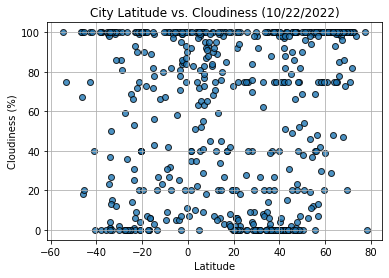

In [43]:
date = dt.date.today().strftime("%m/%d/%Y")

# Create a scatter plot to showcase the relationship between latitude and cloudiness
x_values = cleaned_city_data["Lat"]
y_values = cleaned_city_data["Cloudiness"]

plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save figure
plt.savefig("../output_data/Fig3.png", bbox_inches="tight")
plt.show()

The code is analyzing if there is a correlation between city latitude and cloudiness.

## Latitude vs. Wind Speed Plot

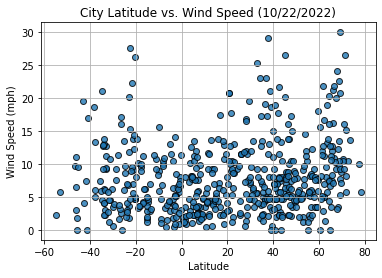

In [44]:
date = dt.date.today().strftime("%m/%d/%Y")

# Create a scatter plot to showcase the relationship between latitude and cloudiness
x_values = cleaned_city_data["Lat"]
y_values = cleaned_city_data["Wind Speed"]

plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save figure
plt.savefig("../output_data/Fig4.png", bbox_inches="tight")
plt.show()

The code is analyzing if there is a correlation between city latitude and wind speed.

## Linear Regression

In [54]:
# Create a function to compute linear regression for each relationship
def plot_linear_regression(x_values, y_values, x_lab, y_lab, hem, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Regression values
    regression_values = x_values * slope + intercept
    
    # Create line equation string
    line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots   
    fig1, ax1 = plt.subplots()
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regression_values,"r-")
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_equation, text_coordinates, fontsize=16, color="red")
    
    # Print r value
    print(f"The r value is: {rvalue}")
    
# Create Northern and Southern Hemisphere Dataframes
northern_hemisphere_weather_df = cleaned_city_data.loc[cleaned_city_data["Lat"] >= 0]
southern_hemisphere_weather_df = cleaned_city_data.loc[cleaned_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.8918674453181976


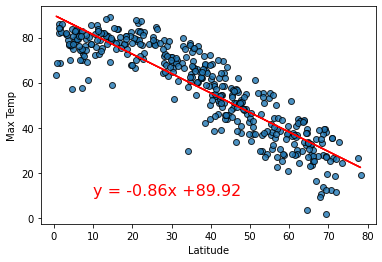

In [88]:
# Create scatter plot for latitude vs max temperature in the Northern Hemisphere
x_values = northern_hemisphere_weather_df["Lat"]
y_values = northern_hemisphere_weather_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Northern", (10, 10))

# Save the figure
plt.savefig("../output_data/linear-regression-northern-hem-temp-latitude.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.6901909814040164


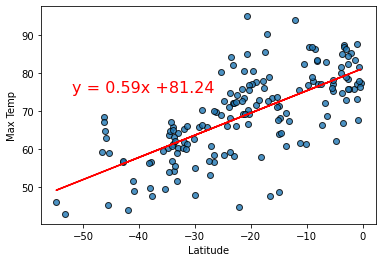

In [89]:
# Create scatter plot for latitude vs max temperature in the Southern Hemisphere
x_values = southern_hemisphere_weather_df["Lat"]
y_values = southern_hemisphere_weather_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Southern", (-52, 75))

# Save the figure
plt.savefig("../output_data/linear-regression-southern-hem-temp-latitude.png", bbox_inches="tight")
plt.show()

After viewing these two plots, the linear regression is modeling that there is a strong negative correlation between max temp and latitude in the Northern Hemisphere, while there is a strong positive correlation between max temp and latitude in the Southern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.17189532688029632


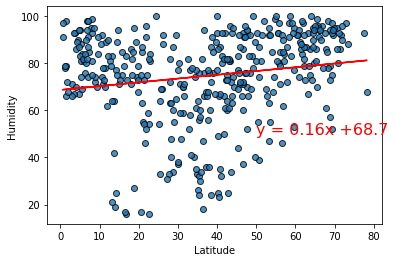

In [90]:
# Create scatter plot for latitude vs humidity in the Northern Hemisphere
x_values = northern_hemisphere_weather_df["Lat"]
y_values = northern_hemisphere_weather_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Northern", (50,50))

# Save the figure
plt.savefig("../output_data/linear-regression-northern-hem-humidity-latitude.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.1064604115414379


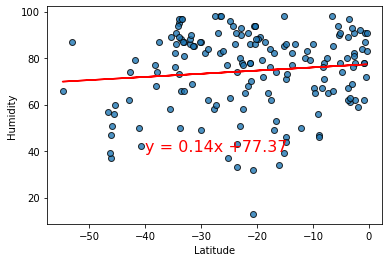

In [91]:
# Create scatter plot for latitude vs humidity in the Southern Hemisphere
x_values = southern_hemisphere_weather_df["Lat"]
y_values = southern_hemisphere_weather_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Southern", (-40,40))

# Save the figure
plt.savefig("../output_data/linear-regression-southern-hem-humidity-latitude.png", bbox_inches="tight")
plt.show()

After viewing these two plots, the linear regression is modeling that there is no correlation between humidity and latitude in the Northern and Southern Hemispheres.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.20475750307131288


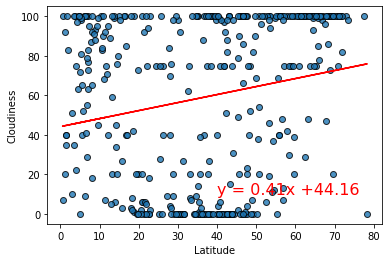

In [92]:
# Create scatter plot for latitude vs cloudiness in the Northern Hemisphere
x_values = northern_hemisphere_weather_df["Lat"]
y_values = northern_hemisphere_weather_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Northern", (40,10))

# Save the figure
plt.savefig("../output_data/linear-regression-northern-hem-cloudiness-latitude.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.06072386698185061


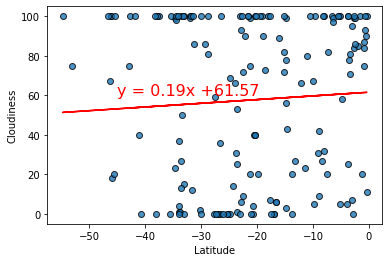

In [93]:
# Create scatter plot for latitude vs cloudiness in the Southern Hemisphere
x_values = southern_hemisphere_weather_df["Lat"]
y_values = southern_hemisphere_weather_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Southern", (-45, 60))

# Save the figure
plt.savefig("../output_data/linear-regression-southern-hem-cloudiness-latitude.png", bbox_inches="tight")
plt.show()

After viewing these two plots, the linear regression is modeling that there is a weakly positive correlation between cloudiness and latitude in the Northern Hemisphere, while there is no correlation between cloudiness and latitude in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.2559625149252368


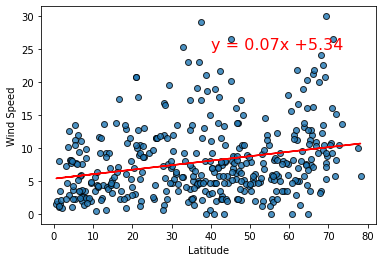

In [94]:
# Create scatter plot for latitude vs wind speed in the Northern Hemisphere
x_values = northern_hemisphere_weather_df["Lat"]
y_values = northern_hemisphere_weather_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Northern", (40, 25))

# Save the figure
plt.savefig("../output_data/linear-regression-northern-hem-wind-speed-latitude.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.12723590279574876


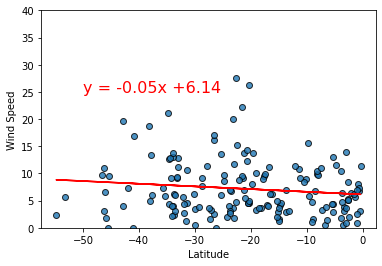

In [95]:
# Create scatter plot for latitude vs wind speed in the Southern Hemisphere
x_values = southern_hemisphere_weather_df["Lat"]
y_values = southern_hemisphere_weather_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Southern", (-50, 25), ylim=40)

# Save the figure
plt.savefig("../output_data/linear-regression-southern-hem-wind-speed-latitude.png", bbox_inches="tight")
plt.show()

After viewing these two plots, the linear regression is modeling that there is a weakly positive correlation between wind speed and latitude in the Northern Hemisphere, while there is no correlation between wind speed and latitude in the Southern Hemisphere.